In [2]:
#!/usr/bin/env python
"""
Demo for tomography test problem on previously saved data
--------------------------------------------------------------------------
Created in 2023 for TRIPs-Py library
"""
__authors__ = "Mirjeta Pasha and Silvia Gazzola"
__affiliations__ = 'MIT and Tufts University, and University of Bath'
__copyright__ = "Copyright 2023, TRIPs-Py library"
__license__ = "Apache"
__version__ = "1.0"
__email__ = "mpasha@mit.edu; mirjeta.pasha1@gmail.com; sg968@bath.ac.uk;"

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
import time
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import numpy as np
import astra
from trips.utilities.phantoms import *
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
import scipy.special as spe
from trips.test_problems.Tomography import *
from trips.solvers.GKS import *
from trips.solvers.MMGKS import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *
from trips.utilities.helpers import *
from trips.solvers.CGLS import CGLS
from trips.solvers.GMRES import GMRES

#### In this notebook we illustrate how to use the Tomography class.
1. Define a tomography problem by loading some saved data


### 1. Define a tomography problem by loading some saved data

In [2]:
# Define an object of the class Tomogrpahy
Tomo = Tomography()
# Specify the dimensions of the phantom and the number of angels 
# Step 1: Define the true solution. 
# Options are: grains, smooth, tectonic, threephases, ppower
testproblem = 'head'
# Generate the data: We can skip Step 1 and generate the sinogram and the operator by the following lines
(A, x_true, b) = Tomo.gen_saved_data('head')
b_vec = b.reshape((-1,1))
nx, ny = x_true.shape[0], x_true.shape[1]

settings
data already in the path.
data already in the path.


In [3]:
# Compute a solution by GKS
# Define a derivative operator as a regularization operator
L = spatial_derivative_operator(nx, ny, 1)
data_vec = b.reshape((-1,1))
# Use GKS to compute an approximate solution
(x_gks, info) = GKS(A, data_vec, L, projection_dim=3, n_iter = 10, regparam = 1, x_true = x_true.reshape(-1,1))

running GKS...: 100%|██████████| 10/10 [00:57<00:00,  5.71s/it]


(Text(0.5, 1.0, 'x_gks'), (-0.5, 511.5, 511.5, -0.5))

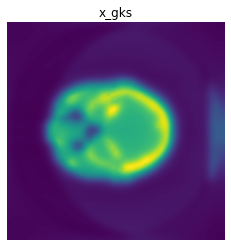

In [4]:
# Display the solution 
plt.imshow(x_gks.reshape((nx,ny)))
plt.title('x_gks'), plt.axis('off')

In [5]:
L = spatial_derivative_operator(nx, ny, 1)
data_vec = b.reshape((-1,1))

In [12]:
# Compute a solution by GKS
# Define a derivative operator as a regularization operator
L = spatial_derivative_operator(nx, ny, 1)
data_vec = b.reshape((-1,1))
# Use GKS to compute an approximate solution
(x_mmgks, info_mmgks) = MMGKS(A, data_vec, L, pnorm=2, qnorm=1, projection_dim=2, n_iter =2, regparam = 0.001, x_true = x_true.reshape((-1,1)))

generating basis...:   0%|          | 0/2 [00:00<?, ?it/s]

running MMGKS...: 100%|██████████| 2/2 [00:14<00:00,  7.37s/it]
